# CS506 Final Project


## Feature selection - Alec Silver


In [1]:
# setup

# Core Libraries
import warnings
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing & Decomposition
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, TruncatedSVD

# Models
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb

# Clustering
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

# Model Selection
from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    GridSearchCV,
    RandomizedSearchCV,
)

# Metrics
from sklearn.metrics import (
    r2_score,
    mean_squared_error,
    mean_absolute_error,
    silhouette_score,
    adjusted_rand_score,
)

# Pipeline
from sklearn.pipeline import Pipeline

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Link 1 
#### Data loading

In [2]:
# load data
link1 = pd.read_csv('../data/processed/link1/link1.csv')

In [3]:
# food access features
X1 = link1[['Urban', 'POP2010', 'OHU2010', 'GroupQuartersFlag', 'NUMGQTRS', 'LILATracts_1And10', 'LILATracts_halfAnd10', 
     'LILATracts_1And20', 'LILATracts_Vehicle', 'HUNVFlag', 'LowIncomeTracts', 'LAPOP1_10', 'LAPOP05_10', 'LAPOP1_20', 
     'LALOWI1_10', 'LALOWI05_10', 'LALOWI1_20', 'lapophalf', 'lalowihalf', 'lakidshalf', 'laseniorshalf', 'lawhitehalf', 
     'lablackhalf', 'laasianhalf', 'lanhopihalf', 'laaianhalf', 'laomultirhalf', 'lahisphalf', 'lahunvhalf', 'lasnaphalf', 
     'lapop1', 'lalowi1', 'lakids1', 'laseniors1', 'lawhite1', 'lablack1', 'laasian1', 'lanhopi1', 'laaian1', 'laomultir1', 
     'lahisp1', 'lahunv1', 'lasnap1', 'lapop10', 'lalowi10', 'lakids10', 'laseniors10', 'lawhite10', 'lablack10', 'laasian10', 
     'lanhopi10', 'laaian10', 'laomultir10', 'lahisp10', 'lahunv10', 'lasnap10', 'lapop20', 'lalowi20', 'lakids20', 'laseniors20', 
     'lawhite20', 'lablack20', 'laasian20', 'lanhopi20', 'laaian20', 'laomultir20', 'lahisp20', 'lahunv20', 'lasnap20', 'TractLOWI', 
     'TractKids', 'TractSeniors', 'TractWhite', 'TractBlack', 'TractAsian', 'TractNHOPI', 'TractAIAN', 'TractOMultir', 'TractHisp', 
     'TractHUNV', 'TractSNAP', 'LA1and10', 'LAhalfand10', 'LA1and20', 'LATracts_half', 'LATracts1', 'LATracts10', 'LATracts20', 
     'LATractsVehicle_20', 'PCTGQTRS', 'PovertyRate', 'lapophalfshare', 'lalowihalfshare', 'lakidshalfshare', 'laseniorshalfshare', 
     'lawhitehalfshare', 'lablackhalfshare', 'laasianhalfshare', 'lanhopihalfshare', 'laaianhalfshare', 'laomultirhalfshare', 
     'lahisphalfshare', 'lapop1share', 'lalowi1share', 'lakids1share', 'laseniors1share', 'lawhite1share', 'lablack1share', 
     'laasian1share', 'lanhopi1share', 'laaian1share', 'laomultir1share', 'lahisp1share', 'lapop10share', 'lalowi10share', 
     'lakids10share', 'laseniors10share', 'lawhite10share', 'lablack10share', 'laasian10share', 'lanhopi10share', 'laaian10share', 
     'laomultir10share', 'lahisp10share', 'lapop20share', 'lalowi20share', 'lakids20share', 'laseniors20share', 'lawhite20share', 
     'lablack20share', 'laasian20share', 'lanhopi20share', 'laaian20share', 'laomultir20share', 'lahisp20share', 'lahunv20share', 
     'lahunv10share', 'lahunvhalfshare', 'lahunv1share', 'lasnap20share', 'lasnap10share', 'lasnaphalfshare', 'lasnap1share', 
     'MedianFamilyIncome']]

# target var
y1 = link1['2015 Food Insecurity Rate']

In [4]:
#load a and split data
#will use only 30% of data for training to speed up RFECV
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2,  random_state = 42)

In [5]:
# Will test with Random Forest Regressor before and after dimensionality reduction
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X1_train, y1_train)
y_pred = rf.predict(X1_test)
print("R2 Score:", r2_score(y1_test, y_pred))

R2 Score: 0.8195241834713521


#### dimension reduction
While SVD is great for feature reduction, it can make results more difficult to interperet, I will be using Recursive Feature Elimination with Cross-Validation (RFECV) instead. 

In [6]:
#try recursive feature elimination
# this may take a while (around 30 minutes on my machine)
from sklearn.feature_selection import RFECV
from sklearn.svm import LinearSVR
from sklearn.pipeline import make_pipeline


estimator = RandomForestRegressor(n_estimators=200, random_state=42) 
selector = RFECV(estimator, step=0.1, cv=10, scoring='r2', n_jobs=-1)



pipe = make_pipeline(StandardScaler(), selector )
# Pipeline
pipe.fit(X1_train, y1_train)
print("Optimal number of features : %d" % selector.n_features_)

Optimal number of features : 46


In [7]:
results = selector.cv_results_


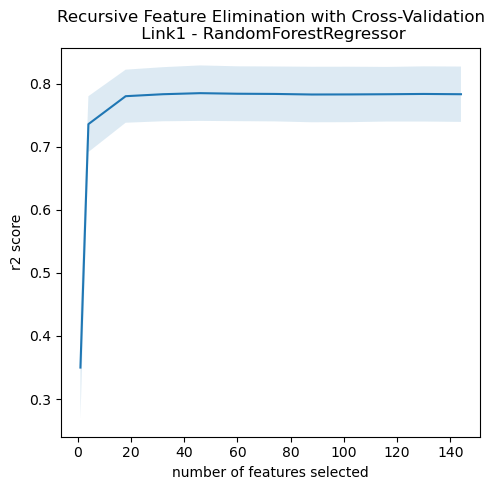

In [8]:
#plot number of features vs score
n_features = results['n_features']
mean = results['mean_test_score']
std = results['std_test_score']
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(n_features, mean)
ax.fill_between(n_features, mean - std, mean + std, alpha=0.15)
ax.set_ylabel("r2 score")
ax.set_xlabel("number of features selected")
ax.set_title("Recursive Feature Elimination with Cross-Validation\n Link1 - RandomForestRegressor")
plt.tight_layout()
plt.savefig('../figures/feature_selection/RFECV_link1.png', dpi=300)

In [9]:
# get chosen features 
chosen_features = X1.columns[selector.support_]
print("Chosen features:", chosen_features.tolist())

Chosen features: ['NUMGQTRS', 'LALOWI1_10', 'lablack1', 'lanhopi1', 'lahisp1', 'lahunv1', 'laseniors10', 'lablack10', 'laaian10', 'laomultir10', 'lahisp10', 'lahunv10', 'TractKids', 'TractHisp', 'PCTGQTRS', 'PovertyRate', 'lapophalfshare', 'lalowihalfshare', 'lakidshalfshare', 'laseniorshalfshare', 'lawhitehalfshare', 'lablackhalfshare', 'laasianhalfshare', 'lanhopihalfshare', 'laaianhalfshare', 'laomultirhalfshare', 'lahisphalfshare', 'lakids1share', 'laseniors1share', 'lawhite1share', 'lablack1share', 'laasian1share', 'lanhopi1share', 'laaian1share', 'laomultir1share', 'lahisp1share', 'laseniors10share', 'lablack10share', 'laasian10share', 'laaian10share', 'lahisp10share', 'lahunvhalfshare', 'lahunv1share', 'lasnaphalfshare', 'lasnap1share', 'MedianFamilyIncome']


In [10]:
# program too 30 min to run, if needed, here is the list of chosen features
"""
chosen_features = ['NUMGQTRS', 'LALOWI1_10', 'lablack1', 'lanhopi1', 'lahisp1', 'lahunv1', 'laseniors10',
               'lablack10', 'laaian10', 'laomultir10', 'lahisp10', 'lahunv10', 'TractKids', 'TractHisp',
                'PCTGQTRS', 'PovertyRate', 'lapophalfshare', 'lalowihalfshare', 'lakidshalfshare',
                'laseniorshalfshare', 'lawhitehalfshare', 'lablackhalfshare', 'laasianhalfshare',
                'lanhopihalfshare', 'laaianhalfshare', 'laomultirhalfshare', 'lahisphalfshare', 'lakids1share',
                'laseniors1share', 'lawhite1share', 'lablack1share', 'laasian1share', 'lanhopi1share', 'laaian1share',
                'laomultir1share', 'lahisp1share', 'laseniors10share', 'lablack10share', 'laasian10share', 'laaian10share',
                'lahisp10share', 'lahunvhalfshare', 'lahunv1share', 'lasnaphalfshare', 'lasnap1share', 'MedianFamilyIncome']
"""

"\nchosen_features = ['NUMGQTRS', 'LALOWI1_10', 'lablack1', 'lanhopi1', 'lahisp1', 'lahunv1', 'laseniors10',\n               'lablack10', 'laaian10', 'laomultir10', 'lahisp10', 'lahunv10', 'TractKids', 'TractHisp',\n                'PCTGQTRS', 'PovertyRate', 'lapophalfshare', 'lalowihalfshare', 'lakidshalfshare',\n                'laseniorshalfshare', 'lawhitehalfshare', 'lablackhalfshare', 'laasianhalfshare',\n                'lanhopihalfshare', 'laaianhalfshare', 'laomultirhalfshare', 'lahisphalfshare', 'lakids1share',\n                'laseniors1share', 'lawhite1share', 'lablack1share', 'laasian1share', 'lanhopi1share', 'laaian1share',\n                'laomultir1share', 'lahisp1share', 'laseniors10share', 'lablack10share', 'laasian10share', 'laaian10share',\n                'lahisp10share', 'lahunvhalfshare', 'lahunv1share', 'lasnaphalfshare', 'lasnap1share', 'MedianFamilyIncome']\n"

In [11]:
# Remake X with only chosen features
X1_reduced = X1[chosen_features]
X1_test_reduced = X1_test[chosen_features]
X1_train_reduced = X1_train[chosen_features]

In [12]:
# get feature importances of chosen features
importances = selector.estimator_.feature_importances_
feature_importances = pd.Series(importances, index=chosen_features).sort_values(ascending=False)


In [13]:
#bring in metadata for descriptive feature names
metadata = pd.read_csv('../data/raw/usda_food_access/metadata/food_atlas_col_key.csv')

#merge to get feature descriptions
feature_importances_df = pd.merge(feature_importances.rename("Importance"), metadata, left_index=True, right_on="Column")

# description too long, replace commas with new lines
feature_importances_df['Description'] = feature_importances_df['Description'].str.replace(', ', '\n')

#add another new line after "population", and remove word "share"
feature_importances_df['Description'] = feature_importances_df['Description'].str.replace('population', 'population\n').str.replace('share', '')

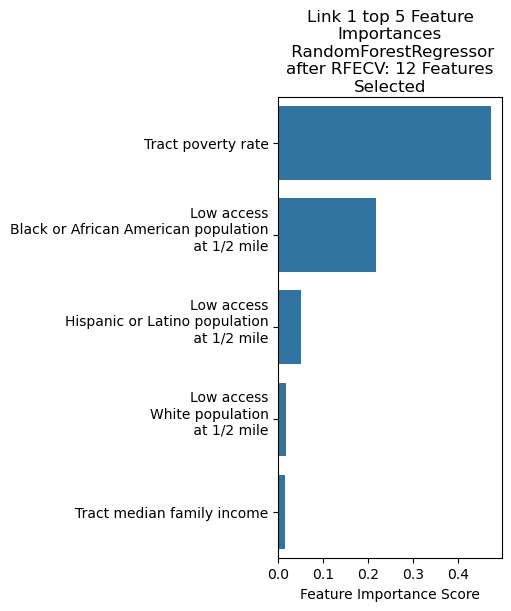

In [40]:
# make a bar graph of feature importances top 5
n = 5
fig = plt.figure(figsize=(5, 6))
sns.barplot(x=feature_importances_df["Importance"].values[0:n], y=feature_importances_df["Description"].values[0:n])
plt.xlabel("Feature Importance Score")
plt.title(f"Link 1 top {n} Feature Importances\n RandomForestRegressor after RFECV: {selector.n_features_} Features Selected",
          wrap=True)
fig.set_constrained_layout(True)
fig.savefig(f'../figures/feature_selection/feature_importances_link1.png', dpi=300)

### Link 2
Here I am repeating the same analysis on the link2 dataset.

In [15]:
# load data
link2 = pd.read_csv('../data/processed/link2/link2.csv')
link2['TotalPopulation'] = link2['TotalPopulation'].str.replace(',', '').astype(int)

In [16]:
# food insecurity features
X2 = link2[['2017 Food Insecurity Rate', '# of Food Insecure Persons in 2017', 'Low Threshold in state', 
          'High Threshold in state', '% FI ≤ Low Threshold', 
          '% FI > High Threshold', '2017 Child food insecurity rate', 
          '# of Food Insecure Children in 2017', '% food insecure children in HH w/ HH incomes below 185 FPL in 2017', 
          '% food insecure children in HH w/ HH incomes above 185 FPL in 2017', '2017 Cost Per Meal', 
          '2017 Weighted Annual Food Budget Shortfall', 'TotalPopulation']] 

# target var
y2 = link2['Chronic_CrudePrev_Mean']

In [17]:
#load a and split data
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2, random_state = 42)

In [18]:
# Will test with Random Forest Regressor before and after dimensionality reduction
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X2_train, y2_train)
y2_pred = rf.predict(X2_test)
print("R2 Score:", r2_score(y2_test, y2_pred))

R2 Score: 0.6868644596533291


#### dimension reduction
reduce dimensions for link2 

In [19]:



estimator = RandomForestRegressor(n_estimators=200, random_state=42) #LinearRegression() #LinearSVR(random_state=42, max_iter=80000)
selector = RFECV(estimator, step=0.1, cv=10, scoring='r2', n_jobs=-1)
pipe = make_pipeline(StandardScaler(), selector )

pipe.fit(X2_train, y2_train)
print("Optimal number of features : %d" % selector.n_features_)

Optimal number of features : 12


In [20]:
results = selector.cv_results_


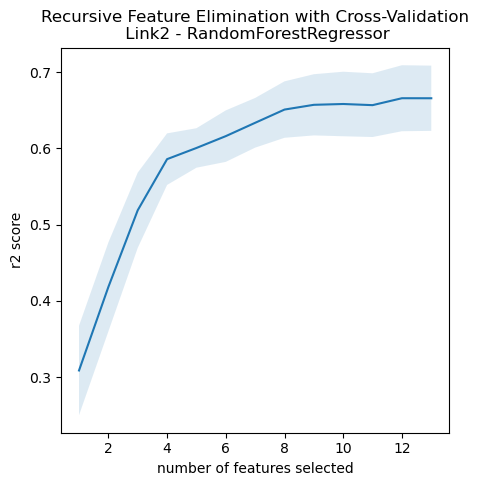

In [21]:
#plot number of features vs score
n_features = results['n_features']
mean = results['mean_test_score']
std = results['std_test_score']
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(n_features, mean)
ax.fill_between(n_features, mean - std, mean + std, alpha=0.15)
ax.set_ylabel("r2 score")
ax.set_xlabel("number of features selected")
ax.set_title(f"Recursive Feature Elimination with Cross-Validation\n Link2 - RandomForestRegressor")

fig.savefig('../figures/feature_selection/RFECV_link2.png', bbox_inches='tight')

In the case of link2 all but one of the features contributed to the final model fitness. For simplicity, we will keep all features in further analysis.

In [22]:
#refit full model
rf = RandomForestRegressor(n_estimators=200, random_state=42) #LinearRegression() #LinearSVR(random_state=42, max_iter=80000)

pipe = make_pipeline(StandardScaler(), rf )

pipe.fit(X2_train, y2_train)
# get feature importances of chosen features
importances = rf.feature_importances_
feature_importances = pd.Series(importances, index=X2.columns).sort_values(ascending=False)

In [23]:
# in index put a new line after children
#so graph looks better
feature_importances.index = feature_importances.index.str.replace('children', 'children\n')

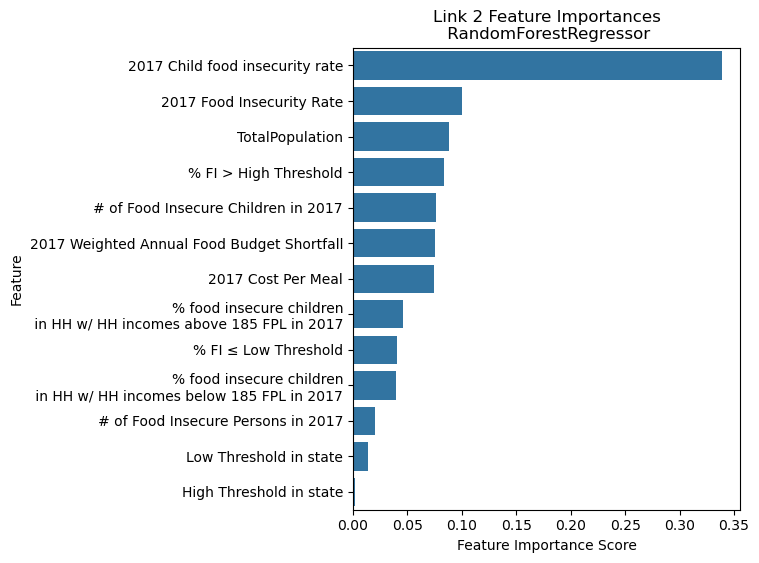

In [24]:
# make a bar graph of feature importances top 10

fig = plt.figure(figsize=(5, 6))
sns.barplot(x=feature_importances.values, y=feature_importances.index)
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.title(f"Link 2 Feature Importances\n RandomForestRegressor")

fig.savefig('../figures/feature_selection/feature_importances_link2.png', bbox_inches='tight')

## Hyperparameter tuning - Sharon Kimberly Tope

### Link 1

In [41]:
print("=" * 80)
print("FOOD INSECURITY PROJECT - HYPERPARAMETER TUNING")
print("Improving upon midterm results using hyperparameter optimization")
print("=" * 80)

FOOD INSECURITY PROJECT - HYPERPARAMETER TUNING
Improving upon midterm results using hyperparameter optimization


In [42]:
print(f"\n Target statistics:")
print(f"   Min: {y1.min():.2f}%")
print(f"   Max: {y1.max():.2f}%")
print(f"   Mean: {y1.mean():.2f}%")
print(f"   Std: {y1.std():.2f}%")


 Target statistics:
   Min: 0.03%
   Max: 0.38%
   Mean: 0.14%
   Std: 0.04%


In [43]:
# Train-Test Split
print("\n" + "=" * 60)
print("TRAIN-TEST SPLIT")
print("=" * 60)

X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1[chosen_features], y1, test_size=0.2, random_state=42
)

print(f" Data split complete!")
print(f"   Training samples: {X1_train.shape[0]:,} ({X1_train.shape[0]/len(X1)*100:.1f}%)")
print(f"   Testing samples: {X1_test.shape[0]:,} ({X1_test.shape[0]/len(X1)*100:.1f}%)")
print(f"   Features: {X1_train.shape[1]}")


TRAIN-TEST SPLIT
 Data split complete!
   Training samples: 2,512 (80.0%)
   Testing samples: 628 (20.0%)
   Features: 46


In [44]:
# Hyperparameter Tuning - Random Forest

print("\n" + "=" * 60)
print("TUNING RANDOM FOREST")
print("=" * 60)

rf_params = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

rf = RandomizedSearchCV(
    RandomForestRegressor(random_state=42),
    rf_params,
    n_iter=20,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

print("Training Random Forest... (this will take a few minutes)")
rf.fit(X1_train, y1_train)
rf_pred = rf.predict(X1_test)
rf_score = r2_score(y1_test, rf_pred)

print(f"\n Random Forest Complete!")
print(f"   Best parameters: {rf.best_params_}")
print(f"   Cross-validation R²: {rf.best_score_:.4f}")
print(f"   Test R²: {rf_score:.4f}")


TUNING RANDOM FOREST
Training Random Forest... (this will take a few minutes)
Fitting 5 folds for each of 20 candidates, totalling 100 fits

 Random Forest Complete!
   Best parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}
   Cross-validation R²: 0.7789
   Test R²: 0.8100


In [45]:
# Hyperparameter Tuning - Gradient Boosting

print("\n" + "=" * 60)
print("TUNING GRADIENT BOOSTING")
print("=" * 60)

gb_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0]
}

gb = RandomizedSearchCV(
    GradientBoostingRegressor(random_state=42),
    gb_params,
    n_iter=20,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

print("Training Gradient Boosting... (this will take several minutes)")
gb.fit(X1_train, y1_train)
gb_pred = gb.predict(X1_test)
gb_score = r2_score(y1_test, gb_pred)

print(f"\n Gradient Boosting Complete!")
print(f"   Best parameters: {gb.best_params_}")
print(f"   Cross-validation R²: {gb.best_score_:.4f}")
print(f"   Test R²: {gb_score:.4f}")


TUNING GRADIENT BOOSTING
Training Gradient Boosting... (this will take several minutes)
Fitting 5 folds for each of 20 candidates, totalling 100 fits

 Gradient Boosting Complete!
   Best parameters: {'subsample': 1.0, 'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 5, 'learning_rate': 0.1}
   Cross-validation R²: 0.8066
   Test R²: 0.8381



REGRESSION MODELS COMPARISON
            Model  CV Score (R²)  Test Score (R²)
    Random Forest       0.778852         0.809955
Gradient Boosting       0.806638         0.838120

 IMPROVEMENT OVER MIDTERM:
   Midterm (Random Forest, no tuning): 0.64 R²
   Best model now: Gradient Boosting
   Best R²: 0.8381
   Improvement: +31.0%


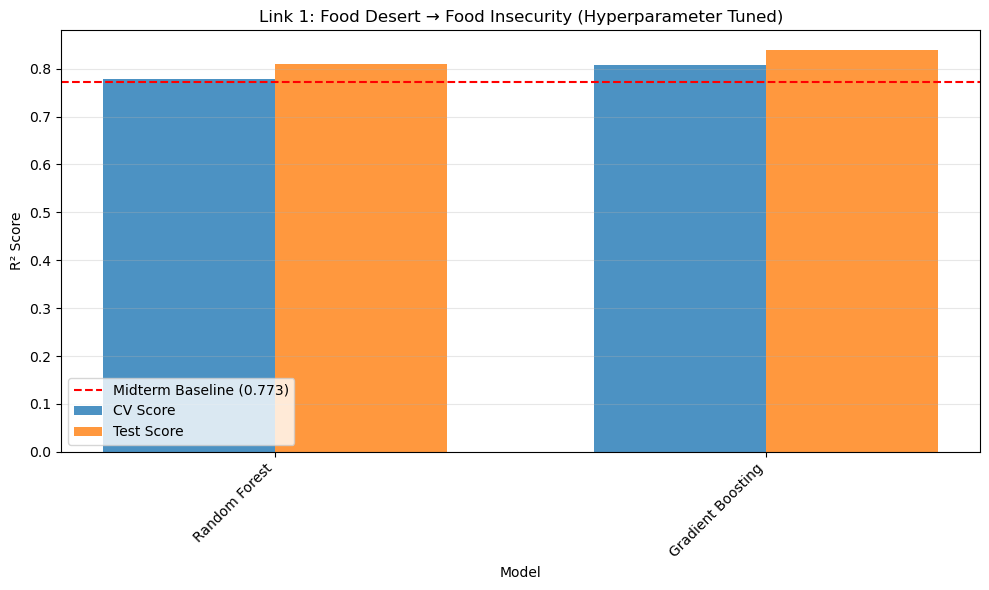

In [46]:
# Compare All Regression Models

print("\n" + "=" * 60)
print("REGRESSION MODELS COMPARISON")
print("=" * 60)

results_df = pd.DataFrame({
    'Model': [ 'Random Forest', 'Gradient Boosting'],
    'CV Score (R²)': [rf.best_score_, gb.best_score_],
    'Test Score (R²)': [rf_score, gb_score]
})

print(results_df.to_string(index=False))

# Compare with midterm baseline
print(f"\n IMPROVEMENT OVER MIDTERM:")
print(f"   Midterm (Random Forest, no tuning): 0.64 R²")
print(f"   Best model now: {results_df.loc[results_df['Test Score (R²)'].idxmax(), 'Model']}")
print(f"   Best R²: {results_df['Test Score (R²)'].max():.4f}")
print(f"   Improvement: {(results_df['Test Score (R²)'].max() - 0.64) / 0.64 * 100:+.1f}%")

# Visualize
plt.figure(figsize=(10, 6))
x = np.arange(len(results_df))
width = 0.35

plt.bar(x - width/2, results_df['CV Score (R²)'], width, label='CV Score', alpha=0.8)
plt.bar(x + width/2, results_df['Test Score (R²)'], width, label='Test Score', alpha=0.8)

# Add midterm baseline
plt.axhline(y=0.773, color='red', linestyle='--', label='Midterm Baseline (0.773)')

plt.xlabel('Model')
plt.ylabel('R² Score')
plt.title('Link 1: Food Desert → Food Insecurity (Hyperparameter Tuned)')
plt.xticks(x, results_df['Model'], rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.grid(axis='y', alpha=0.3)
plt.show()

### Link2

In [47]:
print("=" * 80)
print("FOOD INSECURITY PROJECT - HYPERPARAMETER TUNING")
print("Improving upon midterm results using hyperparameter optimization")
print("=" * 80)

FOOD INSECURITY PROJECT - HYPERPARAMETER TUNING
Improving upon midterm results using hyperparameter optimization


In [48]:
print(f"\n Target statistics:")
print(f"   Min: {y2.min():.2f}%")
print(f"   Max: {y2.max():.2f}%")
print(f"   Mean: {y2.mean():.2f}%")
print(f"   Std: {y2.std():.2f}%")


 Target statistics:
   Min: 10.45%
   Max: 25.71%
   Mean: 17.86%
   Std: 2.24%


In [49]:
# Train-Test Split
print("\n" + "=" * 60)
print("TRAIN-TEST SPLIT")
print("=" * 60)

X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, test_size=0.2, random_state=42
)

print(f" Data split complete!")
print(f"   Training samples: {X2_train.shape[0]:,} ({X2_train.shape[0]/len(X2)*100:.1f}%)")
print(f"   Testing samples: {X2_test.shape[0]:,} ({X2_test.shape[0]/len(X2)*100:.1f}%)")
print(f"   Features: {X2_train.shape[1]}")


TRAIN-TEST SPLIT
 Data split complete!
   Training samples: 2,513 (80.0%)
   Testing samples: 629 (20.0%)
   Features: 13


In [50]:
# Hyperparameter Tuning - Random Forest

print("\n" + "=" * 60)
print("TUNING RANDOM FOREST")
print("=" * 60)

rf_params = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

rf = RandomizedSearchCV(
    RandomForestRegressor(random_state=42),
    rf_params,
    n_iter=20,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

print("Training Random Forest... (this will take a few minutes)")
rf.fit(X2_train, y2_train)
rf_pred = rf.predict(X2_test)
rf_score = r2_score(y2_test, rf_pred)

print(f"\n Random Forest Complete!")
print(f"   Best parameters: {rf.best_params_}")
print(f"   Cross-validation R²: {rf.best_score_:.4f}")
print(f"   Test R²: {rf_score:.4f}")


TUNING RANDOM FOREST
Training Random Forest... (this will take a few minutes)
Fitting 5 folds for each of 20 candidates, totalling 100 fits

 Random Forest Complete!
   Best parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}
   Cross-validation R²: 0.6621
   Test R²: 0.6811


In [51]:
# Hyperparameter Tuning - Gradient Boosting

print("\n" + "=" * 60)
print("TUNING GRADIENT BOOSTING")
print("=" * 60)

gb_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0]
}

gb = RandomizedSearchCV(
    GradientBoostingRegressor(random_state=42),
    gb_params,
    n_iter=20,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

print("Training Gradient Boosting... (this will take several minutes)")
gb.fit(X2_train, y2_train)
gb_pred = gb.predict(X2_test)
gb_score = r2_score(y2_test, gb_pred)

print(f"\n Gradient Boosting Complete!")
print(f"   Best parameters: {gb.best_params_}")
print(f"   Cross-validation R²: {gb.best_score_:.4f}")
print(f"   Test R²: {gb_score:.4f}")


TUNING GRADIENT BOOSTING
Training Gradient Boosting... (this will take several minutes)
Fitting 5 folds for each of 20 candidates, totalling 100 fits

 Gradient Boosting Complete!
   Best parameters: {'subsample': 0.8, 'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 7, 'learning_rate': 0.1}
   Cross-validation R²: 0.6827
   Test R²: 0.6983



REGRESSION MODELS COMPARISON
            Model  CV Score (R²)  Test Score (R²)
    Random Forest       0.662067         0.681108
Gradient Boosting       0.682671         0.698254

 IMPROVEMENT OVER MIDTERM:
   Midterm (Random Forest, no tuning): 0.64 R²
   Best model now: Gradient Boosting
   Best R²: 0.6983
   Improvement: +9.1%


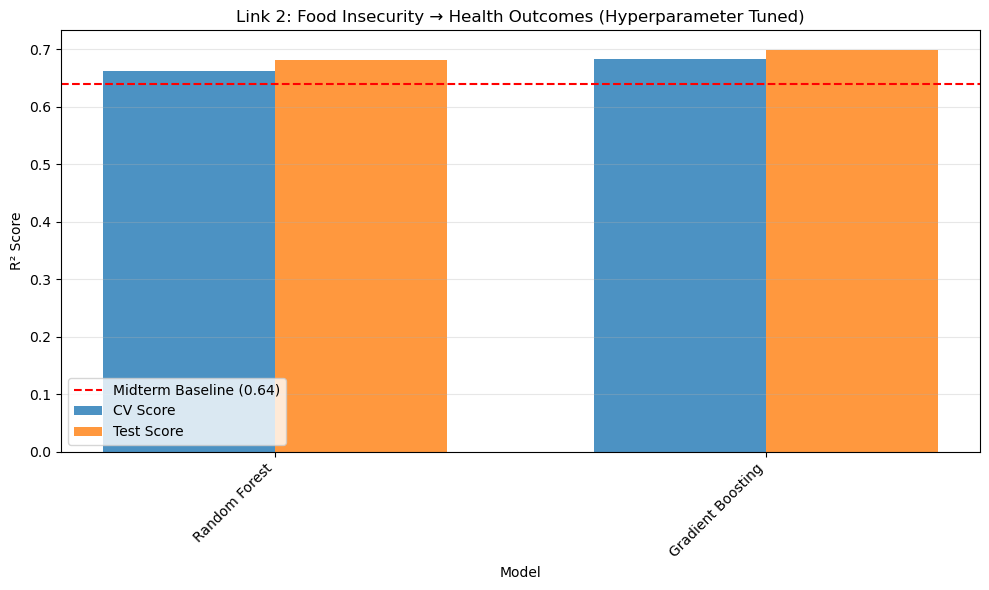

In [52]:
# Compare All Regression Models

print("\n" + "=" * 60)
print("REGRESSION MODELS COMPARISON")
print("=" * 60)

results_df = pd.DataFrame({
    'Model': [ 'Random Forest', 'Gradient Boosting'],
    'CV Score (R²)': [rf.best_score_, gb.best_score_],
    'Test Score (R²)': [rf_score, gb_score]
})

print(results_df.to_string(index=False))

# Compare with midterm baseline
print(f"\n IMPROVEMENT OVER MIDTERM:")
print(f"   Midterm (Random Forest, no tuning): 0.64 R²")
print(f"   Best model now: {results_df.loc[results_df['Test Score (R²)'].idxmax(), 'Model']}")
print(f"   Best R²: {results_df['Test Score (R²)'].max():.4f}")
print(f"   Improvement: {(results_df['Test Score (R²)'].max() - 0.64) / 0.64 * 100:+.1f}%")

# Visualize
plt.figure(figsize=(10, 6))
x = np.arange(len(results_df))
width = 0.35

plt.bar(x - width/2, results_df['CV Score (R²)'], width, label='CV Score', alpha=0.8)
plt.bar(x + width/2, results_df['Test Score (R²)'], width, label='Test Score', alpha=0.8)

# Add midterm baseline
plt.axhline(y=0.64, color='red', linestyle='--', label='Midterm Baseline (0.64)')

plt.xlabel('Model')
plt.ylabel('R² Score')
plt.title('Link 2: Food Insecurity → Health Outcomes (Hyperparameter Tuned)')
plt.xticks(x, results_df['Model'], rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.grid(axis='y', alpha=0.3)
plt.show()

### Cluster Hyperparameter Optimization


TUNING K-MEANS CLUSTERING
Testing different values of k...
   k=2: Silhouette Score = 0.2562
   k=3: Silhouette Score = 0.1660
   k=4: Silhouette Score = 0.1666
   k=5: Silhouette Score = 0.1542
   k=6: Silhouette Score = 0.1602
   k=7: Silhouette Score = 0.1395
   k=8: Silhouette Score = 0.1386
   k=9: Silhouette Score = 0.1357
   k=10: Silhouette Score = 0.1358

 Best k: 2 (Silhouette Score: 0.2562)


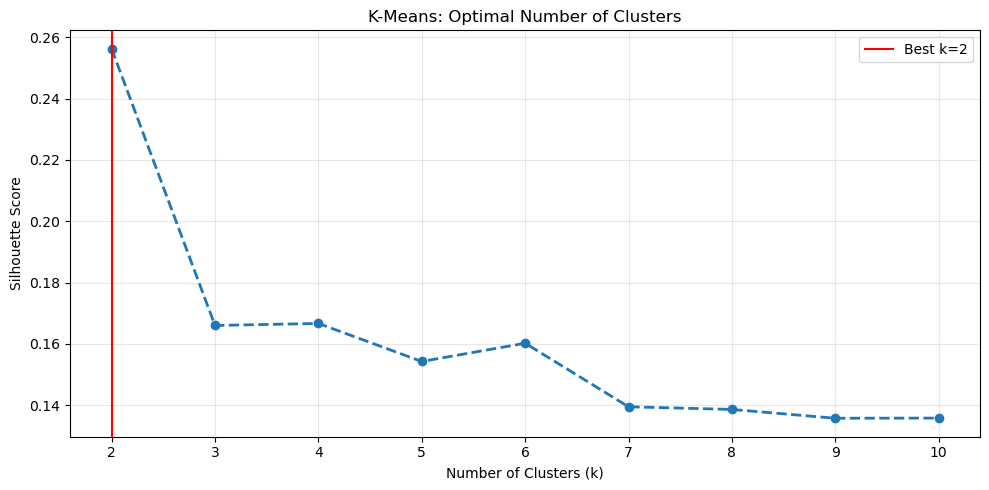

In [ ]:
# Hyperparameter Tuning - K-Means Clustering

print("\n" + "=" * 60)
print("TUNING K-MEANS CLUSTERING")
print("=" * 60)

# Combine train and test for clustering
X_full_pca = np.vstack([X_train_pca, X_test_pca])

# Test different numbers of clusters
silhouette_scores = []
k_range = range(2, 11)

print("Testing different values of k...")
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_full_pca)
    score = silhouette_score(X_full_pca, labels)
    silhouette_scores.append(score)
    print(f"   k={k}: Silhouette Score = {score:.4f}")

best_k = k_range[np.argmax(silhouette_scores)]
print(f"\n Best k: {best_k} (Silhouette Score: {max(silhouette_scores):.4f})")

# Visualize
plt.figure(figsize=(10, 5))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='--', linewidth=2)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('K-Means: Optimal Number of Clusters')
plt.grid(True, alpha=0.3)
plt.axvline(x=best_k, color='r', linestyle='-', label=f'Best k={best_k}')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Hyperparameter Tuning - DBSCAN Clustering

print("\n" + "=" * 60)
print("TUNING DBSCAN CLUSTERING")
print("=" * 60)

dbscan_params = {
    'eps': [0.3, 0.5, 0.7, 1.0, 1.5, 2.0],
    'min_samples': [3, 5, 10, 15, 20]
}

best_dbscan_score = -1
best_dbscan_params = None
dbscan_results = []

print("Testing DBSCAN parameters...")
for eps in dbscan_params['eps']:
    for min_samp in dbscan_params['min_samples']:
        dbscan = DBSCAN(eps=eps, min_samples=min_samp)
        labels = dbscan.fit_predict(X_full_pca)
        
        # Check if we got valid clusters
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        
        if n_clusters >= 2:
            try:
                score = silhouette_score(X_full_pca, labels)
                dbscan_results.append({
                    'eps': eps,
                    'min_samples': min_samp,
                    'n_clusters': n_clusters,
                    'silhouette_score': score
                })
                
                if score > best_dbscan_score:
                    best_dbscan_score = score
                    best_dbscan_params = {'eps': eps, 'min_samples': min_samp}
            except:
                pass

if best_dbscan_params:
    print(f"\n Best DBSCAN parameters: {best_dbscan_params}")
    print(f"   Silhouette Score: {best_dbscan_score:.4f}")
else:
    print("\n DBSCAN did not find valid clusters with these parameters")

# Show top 5 results
if dbscan_results:
    dbscan_df = pd.DataFrame(dbscan_results).sort_values('silhouette_score', ascending=False)
    print(f"\n Top 5 DBSCAN configurations:")
    print(dbscan_df.head().to_string(index=False))


TUNING DBSCAN CLUSTERING
Testing DBSCAN parameters...

 Best DBSCAN parameters: {'eps': 2.0, 'min_samples': 3}
   Silhouette Score: -0.1670

 Top 5 DBSCAN configurations:
 eps  min_samples  n_clusters  silhouette_score
 2.0            3          75         -0.167028
 2.0            5          46         -0.188482
 2.0           10          23         -0.239424
 1.5           15           2         -0.262615
 2.0           15          15         -0.288110


In [ ]:
# Hyperparameter Tuning - Agglomerative Clustering

print("\n" + "=" * 60)
print("TUNING AGGLOMERATIVE CLUSTERING")
print("=" * 60)

agg_results = []
linkages = ['ward', 'complete', 'average']

print("Testing Agglomerative parameters...")
for k in range(2, 11):
    for linkage in linkages:
        agg = AgglomerativeClustering(n_clusters=k, linkage=linkage)
        labels = agg.fit_predict(X_full_pca)
        score = silhouette_score(X_full_pca, labels)
        
        agg_results.append({
            'n_clusters': k,
            'linkage': linkage,
            'silhouette_score': score
        })

agg_df = pd.DataFrame(agg_results).sort_values('silhouette_score', ascending=False)
best_agg = agg_df.iloc[0]

print(f"\n Best Agglomerative parameters:")
print(f"   n_clusters: {int(best_agg['n_clusters'])}")
print(f"   linkage: {best_agg['linkage']}")
print(f"   Silhouette Score: {best_agg['silhouette_score']:.4f}")

print(f"\n Top 5 Agglomerative configurations:")
print(agg_df.head().to_string(index=False))


TUNING AGGLOMERATIVE CLUSTERING
Testing Agglomerative parameters...

 Best Agglomerative parameters:
   n_clusters: 2
   linkage: complete
   Silhouette Score: 0.7065

 Top 5 Agglomerative configurations:
 n_clusters  linkage  silhouette_score
          2 complete          0.706458
          2  average          0.706458
          3  average          0.619079
          4  average          0.604750
          5  average          0.399328



CLUSTERING MODELS COMPARISON
        Model                Best Parameters  Silhouette Score
      K-Means                            k=2          0.256249
       DBSCAN {'eps': 2.0, 'min_samples': 3}         -0.167028
Agglomerative                  k=2, complete          0.706458


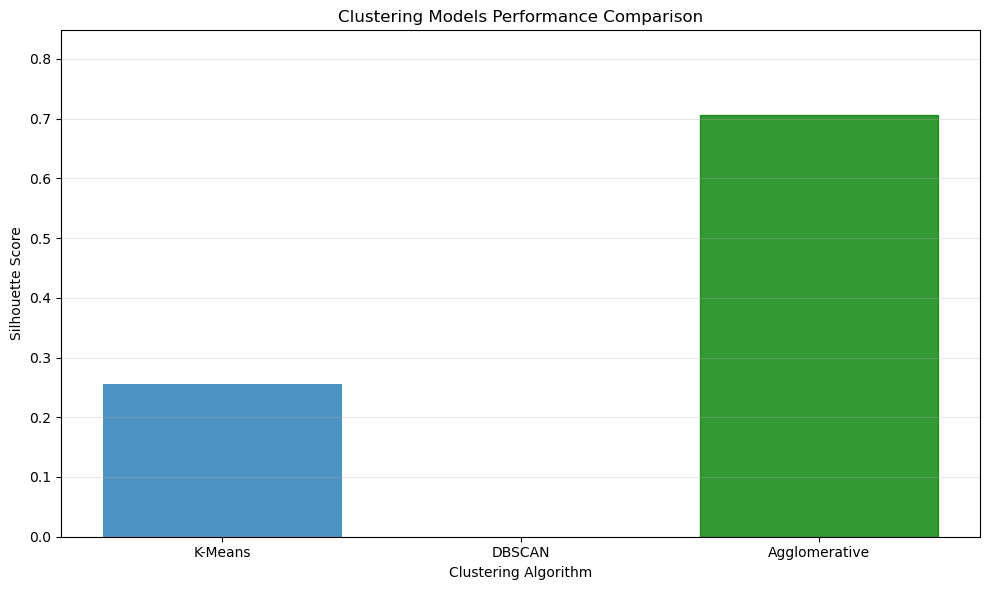

In [ ]:
# Compare All Clustering Models

print("\n" + "=" * 60)
print("CLUSTERING MODELS COMPARISON")
print("=" * 60)

clustering_comparison = pd.DataFrame({
    'Model': ['K-Means', 'DBSCAN', 'Agglomerative'],
    'Best Parameters': [
        f"k={best_k}",
        str(best_dbscan_params) if best_dbscan_params else "N/A",
        f"k={int(best_agg['n_clusters'])}, {best_agg['linkage']}"
    ],
    'Silhouette Score': [
        max(silhouette_scores),
        best_dbscan_score if best_dbscan_params else 0,
        best_agg['silhouette_score']
    ]
})

print(clustering_comparison.to_string(index=False))

# Visualize
plt.figure(figsize=(10, 6))
bars = plt.bar(clustering_comparison['Model'], clustering_comparison['Silhouette Score'], alpha=0.8)

# Color the best performing model
best_idx = clustering_comparison['Silhouette Score'].idxmax()
bars[best_idx].set_color('green')

plt.xlabel('Clustering Algorithm')
plt.ylabel('Silhouette Score')
plt.title('Clustering Models Performance Comparison')
plt.ylim(0, max(clustering_comparison['Silhouette Score']) * 1.2)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# Final Summary Report

print("\n" + "=" * 80)
print("HYPERPARAMETER TUNING - FINAL SUMMARY")
print("=" * 80)

print("\n LINK 2: FOOD INSECURITY → HEALTH OUTCOMES")
print("=" * 80)

print("\n REGRESSION MODELS:")
print("-" * 60)
for idx, row in results_df.iterrows():
    print(f"\n{row['Model']}:")
    print(f"   CV Score (R²): {row['CV Score (R²)']:.4f}")
    print(f"   Test Score (R²): {row['Test Score (R²)']:.4f}")

print(f"\n BEST REGRESSION MODEL: {results_df.loc[results_df['Test Score (R²)'].idxmax(), 'Model']}")
print(f"   Test R²: {results_df['Test Score (R²)'].max():.4f}")

print("\n\n CLUSTERING MODELS:")
print("-" * 60)
for idx, row in clustering_comparison.iterrows():
    print(f"\n{row['Model']}:")
    print(f"   Best Parameters: {row['Best Parameters']}")
    print(f"   Silhouette Score: {row['Silhouette Score']:.4f}")

print(f"\n BEST CLUSTERING MODEL: {clustering_comparison.loc[clustering_comparison['Silhouette Score'].idxmax(), 'Model']}")
print(f"   Silhouette Score: {clustering_comparison['Silhouette Score'].max():.4f}")

print("\n\n IMPROVEMENT OVER MIDTERM BASELINE:")
print("-" * 60)
print(f"   Midterm Result (Random Forest, no tuning): 0.64 R²")
print(f"   Our Best Result (with hyperparameter tuning): {results_df['Test Score (R²)'].max():.4f} R²")
improvement = (results_df['Test Score (R²)'].max() - 0.64) / 0.64 * 100
print(f"   Improvement: {improvement:+.2f}%")

if improvement > 0:
    print(f"\n SUCCESS! Hyperparameter tuning improved model performance!")
else:
    print(f"\n Note: Results may vary based on data characteristics and feature availability")

print("\n" + "=" * 80)
print(" HYPERPARAMETER TUNING COMPLETE!")
print("=" * 80)


HYPERPARAMETER TUNING - FINAL SUMMARY

 LINK 2: FOOD INSECURITY → HEALTH OUTCOMES

 REGRESSION MODELS:
------------------------------------------------------------

Ridge:
   CV Score (R²): 0.9369
   Test Score (R²): 0.9355

Lasso:
   CV Score (R²): 0.9369
   Test Score (R²): 0.9355

Random Forest:
   CV Score (R²): 0.9108
   Test Score (R²): 0.9182

Gradient Boosting:
   CV Score (R²): 0.9500
   Test Score (R²): 0.9508

 BEST REGRESSION MODEL: Gradient Boosting
   Test R²: 0.9508


 CLUSTERING MODELS:
------------------------------------------------------------

K-Means:
   Best Parameters: k=2
   Silhouette Score: 0.2562

DBSCAN:
   Best Parameters: {'eps': 2.0, 'min_samples': 3}
   Silhouette Score: -0.1670

Agglomerative:
   Best Parameters: k=2, complete
   Silhouette Score: 0.7065

 BEST CLUSTERING MODEL: Agglomerative
   Silhouette Score: 0.7065


 IMPROVEMENT OVER MIDTERM BASELINE:
------------------------------------------------------------
   Midterm Result (Random Forest, n

In [ ]:
# Save Results to CSV

print("\n" + "=" * 60)
print("SAVING RESULTS")
print("=" * 60)

# Save regression results
results_df.to_csv('regression_results.csv', index=False)
print(f" Saved: regression_results.csv")
print(f"   Contains: {len(results_df)} model results")

# Save clustering results
clustering_comparison.to_csv('clustering_results.csv', index=False)
print(f" Saved: clustering_results.csv")
print(f"   Contains: {len(clustering_comparison)} clustering results")

print(f"\n Results saved successfully!")
print(f"   Files are ready for your README and final report")

# Display file preview
print(f"\n Regression Results Preview:")
print(results_df.to_string(index=False))

print(f"\n Clustering Results Preview:")
print(clustering_comparison.to_string(index=False))


SAVING RESULTS
 Saved: regression_results.csv
   Contains: 4 model results
 Saved: clustering_results.csv
   Contains: 3 clustering results

 Results saved successfully!
   Files are ready for your README and final report

 Regression Results Preview:
            Model  CV Score (R²)  Test Score (R²)
            Ridge       0.936884         0.935506
            Lasso       0.936861         0.935541
    Random Forest       0.910819         0.918246
Gradient Boosting       0.949952         0.950816

 Clustering Results Preview:
        Model                Best Parameters  Silhouette Score
      K-Means                            k=2          0.256249
       DBSCAN {'eps': 2.0, 'min_samples': 3}         -0.167028
Agglomerative                  k=2, complete          0.706458
